In [1]:
from __future__ import division
from pandas import Series, DataFrame
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
%pylab inline
%gui

Populating the interactive namespace from numpy and matplotlib


In [3]:
# CCTV 데이터 로드
csv_data = pd.read_csv('cctv.csv', encoding='CP949')

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


##### Part 1 CCTV 관리기관 별 관리분포 

In [4]:
# index를 통해 추후 조인을 위한 index를 컬럼으로 변환
idxdata = csv_data.reset_index()

In [5]:
# 컬럼명 '설치년월'에서 null과 not null을 분리하여 가공
# 그 중 null 부분의 데이터를 뽑아 분류
df_two = csv_data[csv_data['설치년월'].isnull()][['소재지도로명주소', '소재지지번주소', '설치년월']]

In [6]:
# 컬럼명 '설치년월'에서 not null 부분의 데이터
# 그 중 소재지지번주소를 기준으로 주소가 없는 경우 도로명주소로 통일
address = np.where(idxdata['소재지도로명주소'].isnull(), idxdata['소재지지번주소'], idxdata['소재지도로명주소'])

In [7]:
# 주소 가공
# 주소의 단어까지만 출력되게 구성( 2개는 2개, 3개는 3개, ... , n개는 n개 )
addr = list()

df_three = Series(address)
for x in df_three:
    addrlist = x.split(' ')
    if len(addrlist) == 2:
        addr.append(addrlist[0] + ' ' + addrlist[1])# + ' ' + addrlist[2])
    elif len(addrlist) == 3:
        addr.append(addrlist[0] + ' ' + addrlist[1] + ' ' + addrlist[2])
    else :
        addr.append(addrlist[0] + ' ' + addrlist[1] + ' ' + addrlist[2] + ' ' + addrlist[3])

addr

['충청북도 보은군 보은읍 삼산리',
 '충청북도 보은군 보은읍 삼산리',
 '충청북도 보은군 장안면 장안리',
 '충청북도 보은군 속리산면 사내리',
 '충청북도 보은군 보은읍 삼산리',
 '충청북도 보은군 수한면 소계리',
 '충청북도 보은군 탄부면 덕동리',
 '충청북도 보은군 삼승면 내망리',
 '충청북도 보은군 회남면 거교리',
 '충청북도 보은군 회인면 중앙리',
 '충청북도 보은군 회인면 중앙리',
 '충청북도 보은군 보은읍 삼산리',
 '충청북도 보은군 보은읍 강신리',
 '충청북도 보은군 마로면 세중리',
 '충청북도 보은군 마로면 세중리',
 '충청북도 보은군 내북면 화전리',
 '충청북도 보은군 삼승면 송죽리',
 '충청북도 보은군 보은읍 이평리',
 '충청북도 보은군 보은읍 이평리',
 '충청북도 보은군 보은읍 성족리',
 '충청북도 보은군 보은읍 보은로',
 '충청북도 보은군 보은읍 삼산남로',
 '충청북도 보은군 보은읍 삼산남로',
 '충청북도 보은군 보은읍 삼산로',
 '충청북도 보은군 보은읍 보은로',
 '충청북도 보은군 보은읍 보은로',
 '충청북도 보은군 수한면 거현리',
 '충청북도 보은군 마로면 적암리',
 '충청북도 보은군 삼승면 내망리',
 '충청북도 보은군 회인면 오동리',
 '충청북도 보은군 회남면 법수리',
 '강원도 인제군 북면 원통로',
 '충청북도 보은군 내북면 봉황리',
 '충청북도 보은군 산외면 대원리',
 '충청북도 보은군 삼승면 원남리',
 '충청북도 보은군 보은읍 금굴리',
 '충청북도 보은군 회인면 송평리',
 '충청북도 보은군 탄부면 상장리',
 '충청북도 보은군 회인면 송평리',
 '충청북도 보은군 마로면 적암리',
 '충청북도 보은군 내북면 봉황리',
 '충청북도 보은군 회남면 남대문리',
 '충청북도 보은군 마로면 한중리',
 '충청북도 보은군 산외면 가고리',
 '충청북도 보은군 보은읍 죽전리',
 '충청북도 보은군 보은읍 죽전리',
 '충청북도 보은군 보은읍 삼산리',
 '충청북도 보은군 

In [8]:
addrser = Series(addr)

In [9]:
# 기존 '소재지도로명주소'와 '소재지지번주소'를 제거
del idxdata['소재지도로명주소']
del idxdata['소재지지번주소']

In [10]:
# 새로운 '소재지주소'를 추가
idxdata['소재지주소'] = addrser
idxdata

,index,관리기관명,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치년월,관리기관전화번호,위도,경도,데이터기준일자,소재지주소
0,0,충청북도 보은군청,생활방범,2,200,NaN,30.0,NaN,043-540-3126,36.485243,127.716365,2018-02-19,충청북도 보은군 보은읍 삼산리
1,1,충청북도 보은군청,생활방범,2,200,NaN,30.0,NaN,043-540-3126,36.483554,127.716087,2018-02-19,충청북도 보은군 보은읍 삼산리
2,2,충청북도 보은군청,생활방범,2,200,NaN,30.0,NaN,043-540-3126,36.470762,127.789868,2018-02-19,충청북도 보은군 장안면 장안리
3,3,충청북도 보은군청,생활방범,2,200,NaN,30.0,NaN,043-540-3126,36.535569,127.822807,2018-02-19,충청북도 보은군 속리산면 사내리
4,4,충청북도 보은군청,생활방범,1,200,NaN,30.0,NaN,043-540-3126,36.484957,127.715344,2018-02-19,충청북도 보은군 보은읍 삼산리
5,5,충청북도 보은군청,생활방범,2,200,NaN,30.0,NaN,043-540-3126,36.458603,127.700717,2018-02-19,충청북도 보은군 수한면 소계리
6,6,충청북도 보은군청,생활방범,3,200,NaN,30.0,NaN,043-540-3126,36.423302,127.777721,2018-02-19,충청북도 보은군 탄부면 덕동리
7,7,충청북도 보은군청,생활방범,3,200,NaN,30.0,NaN,043-540-3126,36.398997,127.739887,2018-02-19,충청북도 보은군 삼승면 내망리
8,8,충청북도 보은군청,생활방범,2,200,NaN,30.0,NaN,043-540-3126,36.444484,127.579134,2018-02-19,충청북도 보은군 회남면 거교리
9,9,충청북도 보은군청,생활방범,3,200,NaN,30.0,NaN,043-540-3126,36.491438,127.596258,2018-02-19,충청북도 보은군 회인면 중앙리


In [11]:
# '설치년월' 가공
# 데이터가 통일되지 않아 'YYYY-MM'이라는 포맷으로 통일
not_null_df = idxdata[idxdata['설치년월'].notnull()]
null_df = idxdata[idxdata['설치년월'].isnull()]
# 영어로 된 월을 추출하기 위한 리스트
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [12]:
# 포맷 리스트
tempDate = list()
targetDate = list()
targetDate_two = list()

# '20xx'에서 xx에 들어갈 항목 생성할 for문 ( 2000~2019 )
for x in range(0, 20):
    temp = ('0'+str(x)) if x < 10 else str(x) # '200x'에서 x가 0~9이면 십의 자리에 0을 붙여주기 위함
    chg = temp
    temp = '20' + temp # '20xx'로 만들기위해 천,백의 자리를 20으로 작성
    for y in range(12): # '월' 생성하기 위한 for문 ( 1 ~ 12 )
        temp_two = (temp + '-0' + str(y+1)) if y < 9 else temp + '-' + str(y+1) # '0~9' 와 '10~12'를 분리하여 구성
        chg_two = month[y] + '-' + chg # 'Jun-6' 포맷으로 리스트 생성
        chg_three = chg + '-' + month[y] # '6-Jun' 포맷으로 리스트 생성
        tempDate.append(temp_two)
        targetDate.append(chg_two)
        targetDate_two.append(chg_three)

# 생성된 포맷들을 'YYYY-MM'으로 변환
analy = not_null_df['설치년월'].replace(targetDate, tempDate).replace(targetDate_two, tempDate)

In [13]:
# 포맷 리스트
tempDate_two = list()
targetDate_four = list()
targetDate_five = list()

# 위의 구성과 비슷하게 작성 '1991~1999'년도 작성을 위함
for x in range(91, 100):
    temp = ('0'+str(x)) if x < 10 else str(x)
    chg = temp
    temp = '19' + temp
    for y in range(12):
        temp_two = (temp + '-0' + str(y+1)) if y < 9 else temp + '-' + str(y+1)
        chg_two = month[y] + '-' + chg
        chg_three = chg + '-' + month[y]
        tempDate_two.append(temp_two)
        targetDate_four.append(chg_two)
        targetDate_five.append(chg_three)

analy = analy.replace(targetDate_four, tempDate_two).replace(targetDate_five, tempDate_two)

In [14]:
# 정규표현식 사용위한 import
import re
temp = list()

# 'YYYY-MM-DD' or 'YYYY.MM.DD' 포맷 중 DD를 빼기위한 정규표현식
r = re.compile('[0-9][0-9][0-9][0-9]-[0-9][0-9]*')
r_two = re.compile('[0-9][0-9][0-9][0-9][.][0-9][0-9]*')


for x in analy.values:
    if str(x)[5:7] == '00':
        temp.append(np.nan)
    elif r.match(x) is not None: # 'YYYY-MM*' 포맷인 경우 MM까지만 리스트에 삽입
        temp.append(x[:7])
    elif r_two.match(x) is not None: # 'YYYY.MM*' 포맷인 경우 MM까지만 리스트에 삽입
        temp.append(x[:4] + '-' + x[5:7])
    else :
        temp.append(np.nan) # 위의 조건에 해당이 되지 않으면 모두 nan

In [15]:
# 가공된 리스트를 '설치년월' 컬럼에 삽입
not_null_df.loc[:, '설치년월'] = temp

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [16]:
# null을 다시 빼기 위해 합쳤다가 다시 추출
df = pd.concat([null_df, not_null_df]).sort_values(by='index').set_index('index')
#df.to_csv('new_cctv.csv')
df.to_excel('result_cctv.xlsx', sheet_name='전국CCTV표준데이터')

In [17]:
# 그래프 출력을 위한 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
# 한글 폰트 인식을 위한 폰트 입력
rc('font', family=font_name)

In [18]:
info = idxdata['관리기관명']
info.value_counts()[:20].sort_values()

서울특별시 중구            1136
경기도 고양시             1147
관악구청                1238
인천광역시 부평구청          1275
경기도 포천시             1312
서울특별시 노원구청          1327
경상북도 포항시청           1330
경기도 이천시청            1338
경기도 성남시청            1493
경기도 안산시청            1614
경기도 부천시청            1640
서울특별시 강남구청          1699
광주광역시청              1726
경기도 평택시             1754
경상남도 창원시청           1875
충청남도 천안시청           1981
경기도 수원시 도시안전통합센터    2396
경상북도 구미시청           2484
울산광역시 남구청           3575
화성시                 4632
Name: 관리기관명, dtype: int64

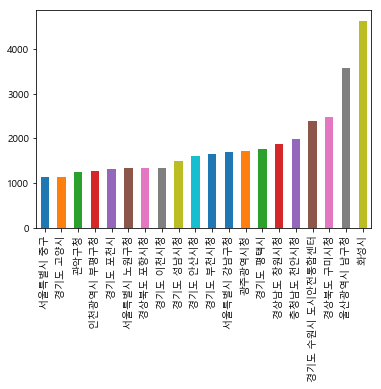

In [19]:
info.value_counts()[:20].sort_values().plot(kind='bar')

##### Part 2 CCTV 지역별 화소수 분석

In [20]:
# '카메라화소수'의 화소수에 따른 CCTV 개수를 파악
df['카메라화소수'].value_counts()

200.0        37179
200          37101
41            6534
130.0         6459
41.0          6190
2000000       5643
130           5305
300           1422
300.0          923
52             640
140.0          369
2000000.0      356
210.0          296
100.0          291
140            288
40             273
100            265
500            258
3000000        235
143.0          201
500.0          189
1300000        178
52.0           176
149.0          131
210            126
40.0           116
280.0          106
145            103
150            101
4000000        100
             ...  
180              2
2100000          1
43               1
43.0             1
180.0            1
51.0             1
57               1
202              1
0                1
2020             1
130+200          1
204              1
132              1
36               1
1                1
68.0             1
201.0            1
78.0             1
410              1
2100000.0        1
203              1
31          

In [21]:
# float 포맷이 존재하여 구분하기 위함
def isNumber(s):
      try:
        float(s)
        return True
      except ValueError:
        return False

# Integer 포맷으로 통일시키기 위함
def toInteger(s):
    try:
        return int(s)
    except ValueError:
        return np.nan

# 십만단위로 작성된 것을 다운그레이드로 통일시키기 위함
def convertPixel(s):
    if float(s) > 10000:
        return s / 10000
    else:
        return float(s)

# 주소의 앞부분만 추출하기 위함
def addrFix(s):
    x = s.split(' ')
    return x[0]

temp = list()

# 소재지지번주소를 기준으로 주소가 없는 경우 도로명주소로 통일
addr = np.where(csv_data['소재지지번주소'].isnull(), csv_data['소재지도로명주소'], csv_data['소재지지번주소'])

# 통일한 주소를 '주소' 컬럼에 삽입
csv_data['주소'] = addr

# 위에 작성한 함수들을 apply로 대입
df = csv_data[csv_data['카메라화소수'].apply(isNumber)].카메라화소수.apply(toInteger).apply(convertPixel)
# 가공한 데이터를 '카메라화소수' 컬럼에 삽입
csv_data['카메라화소수'] = df

# '저화소수'를 분리하기위함
df_two = DataFrame(csv_data, index = df[df <= 51.0].index)
df_three = df_two[['주소', '카메라화소수']]

df_three['주소'] = df_three['주소'].apply(addrFix)
# '주소'와 '카메라화소수' 그룹화를 시켜 새로운 데이터프레임 생성
df_four = DataFrame(df_three.groupby([df_three['주소'], df_three['카메라화소수']]).size()).rename(columns={0: 'counts'}).unstack()
df_four

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


counts                                               ...              \
카메라화소수    0.0  1.0  3.0  19.0 20.0 27.0 28.0  30.0 31.0 33.0 ...  37.0  40.0   
주소                                                           ...               
강원도        NaN  1.0  NaN  NaN  2.0  NaN  NaN   8.0  NaN  NaN ...   NaN  56.0   
경기도        1.0  NaN  NaN  NaN  NaN  NaN  NaN   2.0  1.0  NaN ...   NaN  81.0   
경상남도       NaN  NaN  NaN  6.0  NaN  1.0  3.0   1.0  NaN  9.0 ...   NaN  23.0   
경상북도       NaN  NaN  1.0  NaN  NaN  NaN  NaN   NaN  NaN  NaN ...   NaN  30.0   
광주광역시      NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN ...   NaN   NaN   
대구광역시      NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN ...   NaN   6.0   
대전광역시      NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN ...   NaN   NaN   
부산광역시      NaN  NaN  NaN  NaN  NaN  NaN  NaN   1.0  NaN  NaN ...   NaN  13.0   
서울특별시      NaN  NaN  NaN  NaN  NaN  NaN  NaN   9.0  NaN  NaN ...   NaN   1.0   
세종특별자치시    NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN ...   NaN   NaN   
울산광역시      NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN ...   NaN   NaN   
인천광역시      NaN  NaN  NaN  NaN  NaN  NaN  NaN  19.0  NaN  NaN ...   NaN  50.0   
전라남도       NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN ...   6.0  59.0   
전라북도       NaN  NaN  NaN  NaN  NaN  5.0  NaN  51.0  NaN  NaN ...   NaN  42.0   
충청남도       NaN  NaN  NaN  NaN  NaN  1.0  NaN   2.0  NaN  1.0 ...   NaN   3.0   
충청북도       NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN ...   NaN  25.0   

                                                        
카메라화소수     41.0  42.0 43.0  45.0 47.0  49.0  50.0 51.0  
주소                                                      
강원도       575.0   NaN  1.0   NaN  NaN  11.0   2.0  3.0  
경기도      3880.0  39.0  1.0  43.0  NaN   NaN   NaN  7.0  
경상남도      549.0   1.0  NaN   NaN  NaN   NaN   6.0  1.0  
경상북도      624.0   NaN  NaN   NaN  NaN   NaN   NaN  NaN  
광주광역시      94.0   NaN  NaN   1.0  NaN   NaN   NaN  NaN  
대구광역시     457.0   NaN  NaN   NaN  NaN   NaN   NaN  NaN  
대전광역시      96.0   NaN  NaN   NaN  NaN   NaN   NaN  NaN  
부산광역시     599.0   NaN  NaN   NaN  NaN   NaN   NaN  NaN  
서울특별시    3157.0   NaN  NaN   NaN  NaN   NaN   NaN  NaN  
세종특별자치시   123.0   NaN  NaN   NaN  NaN   NaN   NaN  NaN  
울산광역시     529.0   NaN  NaN   NaN  NaN   NaN   NaN  NaN  
인천광역시     494.0   NaN  NaN   NaN  NaN   NaN   NaN  NaN  
전라남도      481.0   3.0  NaN   NaN  1.0   NaN   NaN  NaN  
전라북도      278.0   NaN  NaN   NaN  NaN   NaN   5.0  NaN  
충청남도      664.0   6.0  NaN  13.0  1.0   NaN   2.0  2.0  
충청북도      185.0   1.0  NaN   9.0  NaN   NaN  26.0  4.0  

[16 rows x 23 columns]

In [22]:
df_four['counts'].stack().강원도.sum()

660.0

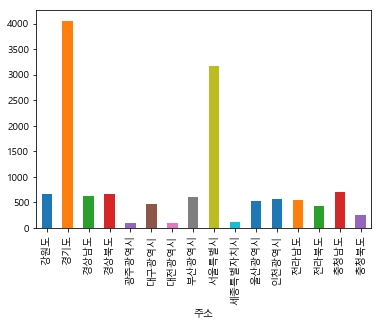

In [23]:
df_five = df_four.fillna(0).sum(axis=1)
df_five.plot(kind='bar')

##### Part 3 CCTV 교통사고

##### 초기 데이터 가공

In [35]:
# 교통사고 데이터 로드
car_2016 = pd.read_excel('2016_car_accident.xls', header = [0, 1, 2], index_col=[0, 1, 2], encoding='CP949')
temp_df = DataFrame(car_2016.iloc[:, 0])
# dataframe multi level columns delete위해 droplevel() 사용
# 지역별 발생한 교통사고와 구성비(%)만 추출
temp_df.columns = temp_df.columns.droplevel().droplevel()
temp_df

합계
합계          합계   발생건수    220917.0
                 구성비(%)     100.0
                 사망자수      4292.0
                 구성비(%)     100.0
                 부상자수    331720.0
                 구성비(%)     100.0
                 중상자수     82463.0
                 구성비(%)     100.0
                 경상자수    226283.0
                 구성비(%)     100.0
                 부상신고자수   22974.0
                 구성비(%)     100.0
서울          합계   발생건수     40039.0
                 구성비(%)     100.0
                 사망자수       348.0
                 구성비(%)     100.0
                 부상자수     55669.0
                 구성비(%)     100.0
                 중상자수     12911.0
                 구성비(%)     100.0
                 경상자수     37098.0
                 구성비(%)     100.0
                 부상신고자수    5660.0
                 구성비(%)     100.0
            종로구  발생건수      1299.0
                 구성비(%)     100.0
                 사망자수         9.0
                 구성비(%)     100.0
                 부상자수      1748.0
                 구성비(%)     100.0
...                           ...
제주          합계   구성비(%)     100.0
                 경상자수      4497.0
                 구성비(%)     100.0
                 부상신고자수     791.0
                 구성비(%)     100.0
            제주시  발생건수      3171.0
                 구성비(%)     100.0
                 사망자수        44.0
                 구성비(%)     100.0
                 부상자수      4823.0
                 구성비(%)     100.0
                 중상자수       980.0
                 구성비(%)     100.0
                 경상자수      3299.0
                 구성비(%)     100.0
                 부상신고자수     544.0
                 구성비(%)     100.0
            서귀포시 발생건수      1263.0
                 구성비(%)     100.0
                 사망자수        36.0
                 구성비(%)     100.0
                 부상자수      2062.0
                 구성비(%)     100.0
                 중상자수       617.0
                 구성비(%)     100.0
                 경상자수      1198.0
                 구성비(%)     100.0
                 부상신고자수     247.0
                 구성비(%)     100.0
출처) 도로교통공단. 서귀포시 구성비(%)       NaN

[2965 rows x 1 columns]

In [36]:
# 지역별 발생건수와 비율을 백분율로 표시하는 것만 추출
total = temp_df.reset_index()
total_two = total[total['level_1'] == '합계']
total_three = total_two[total_two['level_2'] == '발생건수'].drop('level_1', axis=1)

totals = total_three.iloc[0, 2]

temp = list()

for x in total_three['합계'].values:
    temp.append((int(x) / totals) * 100)
    
total_three['Rate'] = temp
result = total_three.drop('level_2', axis=1).set_index('level_0').rename(index={'level_0' : 'local'})

In [37]:
result

,합계,Rate
level_0,,
합계,220917.0,100.000000
서울,40039.0,18.124001
부산,12192.0,5.518815
대구,13098.0,5.928924
인천,8535.0,3.863442
광주,7354.0,3.328852
대전,7535.0,3.410783
울산,4496.0,2.035153
세종,521.0,0.235835


In [44]:
result.index.name = 'local'
result_two = result.reset_index()

In [45]:
# 컬럼'합계'를 기준으로 정렬
idx = result.sort_index().drop('합계').index

In [46]:
# 주소 앞 글자를 추출하기 위함
def countLocal(x):
    return x.split(' ')[0]

newdf = idxdata['소재지주소'].apply(countLocal).value_counts()

In [47]:
total_five = DataFrame(newdf).drop('순창군')['소재지주소'].sort_index()
total_five.index = idx

In [48]:
total_six = DataFrame(total_five.sort_values(ascending=False))
total_six.index.name = 'local'
total_seven = total_six.reset_index()

In [51]:
# CCTV 표준데이터의 '소재지주소'와 교통사고 데이터의 '합계'를 머지
total_eight = pd.merge(total_seven, result_two, how='outer').set_index('local').rename(columns={'소재지주소' : 'cctv_counts', '합계' : 'accident_counts'})

In [52]:
# CCTV 표준데이터와 교통사고 데이터를 하나의 DataFrame으로 변환
total_eight.iloc[-1,0] = total_eight['cctv_counts'].sum()
total_eight

total_two = total_eight.iloc[-1,0]

temp_two = list()

for x in total_eight['cctv_counts'].values:
    temp_two.append((int(x) / total_two) * 100)

total_eight['cctv_Rate'] = temp_two
total_eight

,cctv_counts,accident_counts,Rate,cctv_Rate
local,,,,
경기,28784.0,51013.0,23.091478,22.852606
서울,19406.0,40039.0,18.124001,15.407090
경북,10425.0,14629.0,6.621944,8.276766
경남,9215.0,12522.0,5.668192,7.316105
충남,7833.0,8962.0,4.056727,6.218888
울산,7144.0,4496.0,2.035153,5.671867
부산,6810.0,12192.0,5.518815,5.406693
대구,6766.0,13098.0,5.928924,5.371760
전북,6391.0,7850.0,3.553371,5.074034


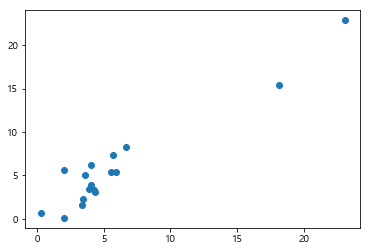

In [56]:
# 산포도 작성 ( 위의 데이터를 토대로 )
plt.scatter(total_eight.drop('합계').iloc[:, 2], total_eight.drop('합계').cctv_Rate)